In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

df = pd.read_csv('train_set.txt',header=None, sep=',')

In [14]:
#name the columns

df.rename(columns={0: 'x_1', 
                   1: 'x_2',
                   2: 'y'}, inplace=True)

## Build New Attributes

In [15]:

df['x_3'] = df.x_1**2

df['x_4'] = df.x_2**2

df['x_5'] = df.x_1*df.x_2

#convert y
y_map = {'r':0,'g':1,'b':2}
df['y'] = df['y'].map(y_map)


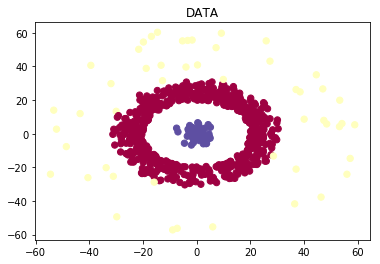

In [16]:
#Create Input and Output columns
X = df[['x_1', 'x_2']].values.T
Y = df[['y']].values.T
Y = Y.astype('uint8')


#Make a scatter plot
plt.scatter(X[0, :], X[1, :], c=Y[0,:], s=40, cmap=plt.cm.Spectral);
plt.title("DATA")

plt.show()

## Input X_3 and X_4 Output Y

In [17]:
#Create Input and Output columns
X= df.drop(labels=['y','x_1','x_2','x_5'],axis=1)
y=df['y']

split_size=0.3

# 70 / 30 Train-Test Split
(X_train, X_test, y_train, y_test) = train_test_split(X,y,test_size=split_size,random_state=2)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train) 

X_test = scaler.transform(X_test) 


# 80 / 20 Train / Validation Split
(X_train, X_val, y_train, y_val) = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

In [18]:
#SPLIT ALLOCATION
print("Split Allocation ---------------------")
print("training: {}".format(len(y_train)))
print("validation: {}".format(len(y_val)))
print("testing: {}".format(len(y_test)))

Split Allocation ---------------------
training: 383
validation: 96
testing: 206


In [45]:
from sklearn.neural_network import MLPClassifier 

model = MLPClassifier(activation='tanh',solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8,4), random_state=1, learning_rate_init=.03)
model.fit(X_train, y_train)
score = model.score(X_val, y_val)
print("tanh, SGD, Layer = 8, Neuron 1 = 0.9791666666666666")
print("relu & lbfgs, Layer = 8, Neuron 1 = 0.9895833333333334")
print("tanh & lbfgs, Layer = 8, Neuron 1 = 1.0")
print("tanh & lbfgs, Layer = 8, Neuron 2 = 0.9895833333333334")
print("tanh & lbfgs, Layer = 8, Neuron 4 = 1.0")
print(score)

tanh, SGD, Layer = 8, Neuron 1 = 0.9791666666666666
relu & lbfgs, Layer = 8, Neuron 1 = 0.9895833333333334
tanh & lbfgs, Layer = 8, Neuron 1 = 1.0
tanh & lbfgs, Layer = 8, Neuron 2 = 0.9895833333333334
tanh & lbfgs, Layer = 8, Neuron 4 = 1.0
1.0


In [46]:
clf = MLPClassifier(activation='tanh',solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8), random_state=1, learning_rate_init=.03)
clf.fit(X_test, y_test)
nn_predictions=clf.predict(X_test)

In [47]:
# report
from sklearn import metrics
from sklearn.metrics import classification_report

print("Neural Net Learner")
print(classification_report(y_test, nn_predictions))
print("Accuracy:",metrics.accuracy_score(y_test, nn_predictions))

Neural Net Learner
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       172
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        16

   micro avg       1.00      1.00      1.00       206
   macro avg       1.00      1.00      1.00       206
weighted avg       1.00      1.00      1.00       206

Accuracy: 1.0


## Input X_3 & X_5 : Output Y

In [52]:
#Create Input and Output columns
X= df.drop(labels=['y','x_1','x_2','x_4'],axis=1)
y=df['y']

split_size=0.3

# 70 / 30 Train-Test Split
(X_train, X_test, y_train, y_test) = train_test_split(X,y,test_size=split_size,random_state=2)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train) 

X_test = scaler.transform(X_test) 


# 80 / 20 Train / Validation Split
(X_train, X_val, y_train, y_val) = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

model = MLPClassifier(activation='tanh',solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8), random_state=1, learning_rate_init=.03)
model.fit(X_train, y_train)

clf = MLPClassifier(activation='tanh',solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8), random_state=1, learning_rate_init=.03)
clf.fit(X_test, y_test)
nn_predictions=clf.predict(X_test)

print("Neural Net Learner")
print(classification_report(y_test, nn_predictions))
print("Accuracy:",metrics.accuracy_score(y_test, nn_predictions))
print("Note: Accuracy in using activation method relu was 0.9951456310679612, higher than activation method tanh")


Neural Net Learner
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       172
           1       1.00      0.94      0.97        18
           2       0.68      0.94      0.79        16

   micro avg       0.96      0.96      0.96       206
   macro avg       0.89      0.95      0.91       206
weighted avg       0.97      0.96      0.96       206

Accuracy: 0.9611650485436893
Note: Accuracy in using activation method relu was 0.9951456310679612, higher than activation method tanh


## Input X_3, X_4, X_5: Output Y

In [49]:
#Create Input and Output columns
X= df.drop(labels=['y','x_1','x_2'],axis=1)
y=df['y']

split_size=0.3

# 70 / 30 Train-Test Split
(X_train, X_test, y_train, y_test) = train_test_split(X,y,test_size=split_size,random_state=2)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train) 

X_test = scaler.transform(X_test) 


# 80 / 20 Train / Validation Split
(X_train, X_val, y_train, y_val) = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

model = MLPClassifier(activation='tanh',solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8), random_state=1, learning_rate_init=.03)
model.fit(X_train, y_train)

clf = MLPClassifier(activation='tanh',solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8), random_state=1, learning_rate_init=.03)
clf.fit(X_test, y_test)
nn_predictions=clf.predict(X_test)

print("Neural Net Learner")
print(classification_report(y_test, nn_predictions))
print("Accuracy:",metrics.accuracy_score(y_test, nn_predictions))

Neural Net Learner
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       172
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        16

   micro avg       1.00      1.00      1.00       206
   macro avg       1.00      1.00      1.00       206
weighted avg       1.00      1.00      1.00       206

Accuracy: 1.0


## All Inputs: Output Y

In [50]:
#Create Input and Output columns
X= df.drop(labels=['y'],axis=1)
y=df['y']

split_size=0.3

# 70 / 30 Train-Test Split
(X_train, X_test, y_train, y_test) = train_test_split(X,y,test_size=split_size,random_state=2)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train) 

X_test = scaler.transform(X_test) 


# 80 / 20 Train / Validation Split
(X_train, X_val, y_train, y_val) = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

model = MLPClassifier(activation='tanh',solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8), random_state=1, learning_rate_init=.03)
model.fit(X_train, y_train)

clf = MLPClassifier(activation='tanh',solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8), random_state=1, learning_rate_init=.03)
clf.fit(X_test, y_test)
nn_predictions=clf.predict(X_test)

print("Neural Net Learner")
print(classification_report(y_test, nn_predictions))
print("Accuracy:",metrics.accuracy_score(y_test, nn_predictions))

Neural Net Learner
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       172
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        16

   micro avg       1.00      1.00      1.00       206
   macro avg       1.00      1.00      1.00       206
weighted avg       1.00      1.00      1.00       206

Accuracy: 1.0
